# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-22 10:00:03.675560


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/21/20


,9/21/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6856884,199865,2.91
Brazil,4558040,137272,3.01
India,5562663,88935,1.60
Mexico,700580,73697,10.52
United Kingdom,401122,41877,10.44
Italy,299506,35724,11.93
Peru,768895,31369,4.08


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/21/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
42209,US,6768119,2020-09-19,199282.0,712.0,44186.0,40428.000000
42208,US,6723933,2020-09-18,198570.0,937.0,49522.0,40040.142857
42207,US,6674411,2020-09-17,197633.0,870.0,44360.0,39758.714286
42206,US,6630051,2020-09-16,196763.0,982.0,37709.0,38548.428571
42205,US,6592342,2020-09-15,195781.0,1288.0,38690.0,37904.714286
42204,US,6553652,2020-09-14,194493.0,422.0,33530.0,36147.142857
42203,US,6520122,2020-09-13,194071.0,378.0,34999.0,34822.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/21/20


,9/21/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,450473,33092.0,7.35
New Jersey,200154,16069.0,8.03
Texas,734778,15127.0,2.06
California,790096,15056.0,1.91
Florida,685439,13317.0,1.94
Massachusetts,127796,9317.0,7.29
Illinois,277920,8693.0,3.13


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/21/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1461,California,783313,2020-09-19,15018.0,125.0,3822.0,3482.857143
1460,California,779491,2020-09-18,14893.0,89.0,4454.0,3512.285714
1459,California,775037,2020-09-17,14804.0,113.0,3716.0,3439.428571
1458,California,771321,2020-09-16,14691.0,97.0,3117.0,3433.000000
1457,California,768204,2020-09-15,14594.0,155.0,3070.0,3408.571429
1456,California,765134,2020-09-14,14439.0,61.0,3406.0,3452.714286
1455,California,761728,2020-09-13,14378.0,51.0,2795.0,3267.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/21/20


,9/21/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,261446,6366.0,2.43
Riverside,57419,1162.0,2.02
Orange,52201,1128.0,2.16
San Bernardino,52649,908.0,1.72
San Diego,44925,760.0,1.69
San Joaquin,19841,415.0,2.09
Sacramento,21628,383.0,1.77


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/21/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4633,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286
4632,Los Angeles,258516,2020-09-18,6330.0,6.0,1245.0,921.428571
4631,Los Angeles,257271,2020-09-17,6324.0,21.0,1123.0,892.428571
4630,Los Angeles,256148,2020-09-16,6303.0,30.0,1099.0,898.428571
4629,Los Angeles,255049,2020-09-15,6273.0,42.0,393.0,829.714286
4628,Los Angeles,254656,2020-09-14,6231.0,23.0,671.0,833.571429
4627,Los Angeles,253985,2020-09-13,6208.0,11.0,809.0,807.285714
4626,Los Angeles,253176,2020-09-12,6197.0,26.0,1110.0,804.857143
4625,Los Angeles,252066,2020-09-11,6171.0,43.0,1042.0,808.428571
4624,Los Angeles,251024,2020-09-10,6128.0,38.0,1165.0,860.714286



7 day new US cases as of 9/21/20


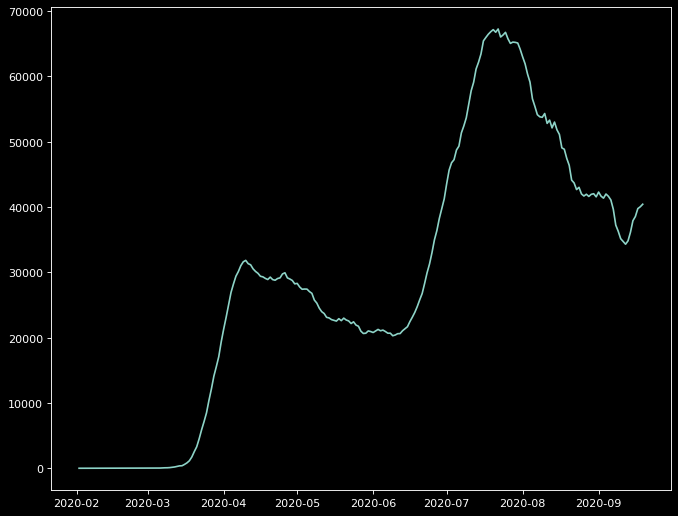

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/21/20


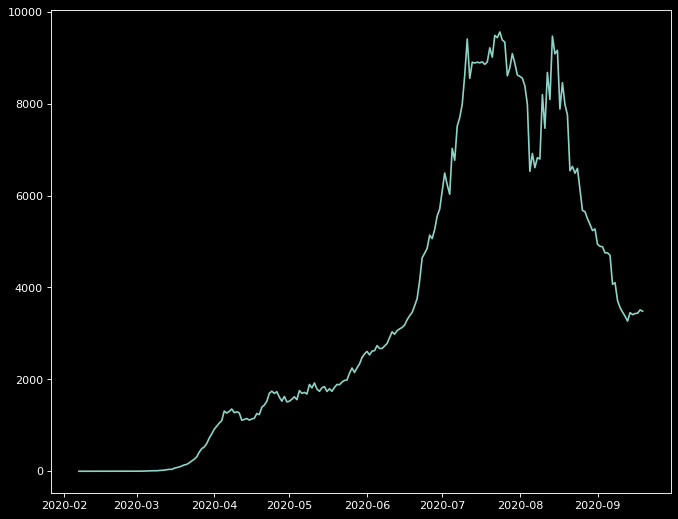

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/21/20


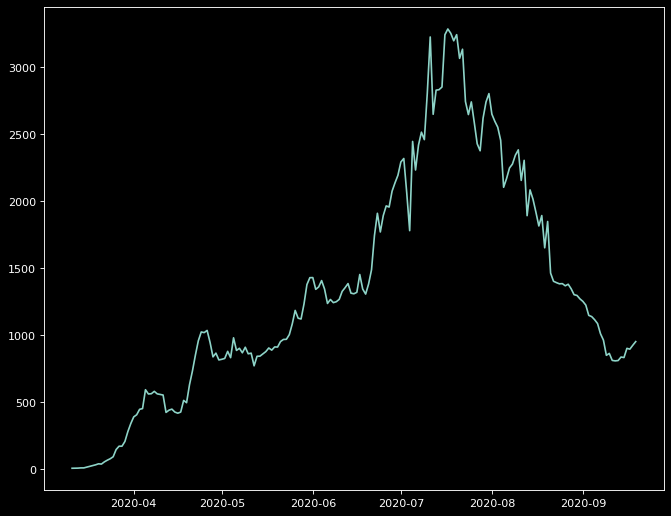

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()